loss_train: 3898.07292456
loss_test: 1748.04226342


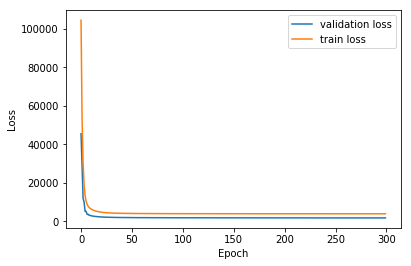

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

#读取数据，将X增加一个特征，X=(X;1),划分训练集和验证集
X_data, y_data = load_svmlight_file("housing_scale.txt")
temp = np.ones(shape=[len(y_data), 1])
X_data = np.concatenate([X_data.toarray(), temp], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

#根据Loss=(y-X*w)^T*(y-X*w)/2计算Loss
def getLoss(X, y, theta):
    return np.dot((y - np.dot(X, theta)).T, y - np.dot(X, theta)) / 2

#LinearRegression主过程
def work(X_train, y_train, X_test, y_test, w_train, lr, max_epoch, loss_train, loss_test, epochs):
    #开始训练，迭代max_epoch次
    for i in range(0, max_epoch):
        #添加画图列表的数据，利用getLoss计算相应集合上的Loss
        epochs.append(i)
        loss_train.append(getLoss(X_train, y_train, w_train))
        loss_test.append(getLoss(X_test, y_test, w_train))
        
        #根据gradient=X^T*(X*w-y)计算梯度
        gradient = np.dot(X_train.T, np.dot(X_train, w_train) - y_train) / len(y_train)
        
        #更新w
        w_train = w_train - lr * gradient
    return w_train

#全零初始化
w_train = np.zeros(X_train.shape[1])

#初始化超参数
lr = 0.35
max_epoch = 300

#画图列表的初始化，epochs存迭代次数，loss_train为训练集Loss，loss_test为验证集Loss
epochs = []
loss_train = []
loss_test = []
w_train = work(X_train, y_train, X_test, y_test, w_train, lr, max_epoch, loss_train, loss_test, epochs)

#输出最后一次迭代前的训练集和验证集上的Loss，用以调参
print("loss_train:", loss_train[len(loss_train)-1])
print("loss_test:", loss_test[len(loss_test)-1])

#显示训练集和验证集的Loss随迭代次数增加而变化的图形
plt.plot(epochs, loss_test, label='validation loss')
plt.plot(epochs, loss_train, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
